In [31]:
import antiCPy
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import mode

In [32]:
from antiCPy.trend_extrapolation.cp_segment_fit import CPSegmentFit

In [33]:
# get a seed
np.random.seed(1234)


In [34]:
def Reduced(x):
    # Reduces the range of the x axis to suit the calculated probability, 
    # i.e. drops first and last values
    X = x[1:]
    return(X[:-1])

In [35]:
# all in one function
def CP_Distribution(x,Y,n):
    y = np.sort(Y)
    
    
    CPFit = CPSegmentFit(x_data = x,
                         y_data = y,
                         number_expected_changepoints = n,
                         num_MC_cp_samples = 1000000,
                         z_array_size = 100                         
                        )
    
    CPFit.initialize_MC_cp_configurations(print_sum_control = True)
    CPFit.initialize_A_matrices()
    try:
        CPFit.Q_matrix_and_inverse_Q()
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            CPFit.initialize_MC_cp_configurations()
            CPFit.initialize_A_matrices()
            
    
    CPFit.calculate_f0()
    CPFit.calculate_residue()
    CPFit.calculate_marginal_likelihood()
    CPFit.calculate_marginal_cp_pdf()
    CPFit.calculate_prob_cp()
    
    return(CPFit.prob_cp)

### Now with the elbow data

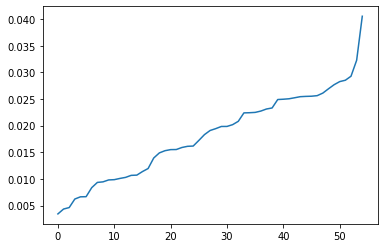

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

Text(0.5, 1.0, 'Distribution of the Change Point')

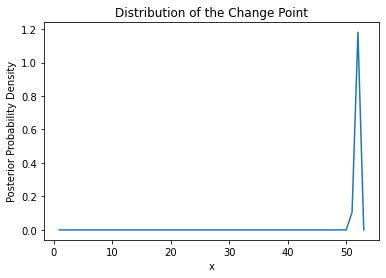

In [36]:
XDat = np.load("XAI_3.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)
plt.show()
XAI_x = np.arange(len(XDat_sort))
CP_XAI = CP_Distribution(XAI_x,XDat_sort,1)
plt.plot(Reduced(XAI_x),CP_XAI)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

### And with less obvious elbow data

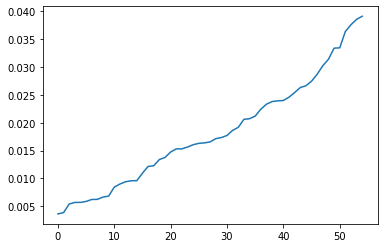

In [37]:
XDat = np.load("XAI_2.npy")
XDat_sort = np.sort(XDat)
XAI_x = np.arange(len(XDat_sort))

plt.plot(XAI_x,
         XDat_sort)


number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

Text(0.5, 1.0, 'Distribution of the Change Point')

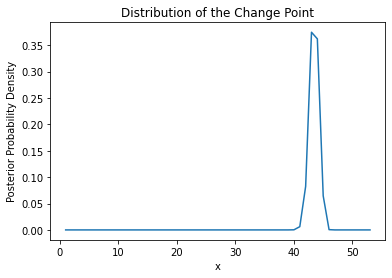

In [38]:
CP_XAI = CP_Distribution(XAI_x,XDat_sort,1)

plt.plot(Reduced(XAI_x),CP_XAI)
plt.xlabel("x")
plt.ylabel("Posterior Probability Density")
plt.title("Distribution of the Change Point")

## More selective Output

Make sure that the output of the function is 
1) The number of relevant terms
2) The index of the relevant terms

In [39]:
# all in one function: both number of relevant terms and index of relevant terms as output
# input: "time" x, Time Series Y that will be sorted ascendingly, n number of Change Points
def CP_Distr(x,Y,n):
    y = np.sort(Y)
    
    
    CPFit = CPSegmentFit(x_data = x,
             y_data = y,
             number_expected_changepoints = n,
             num_MC_cp_samples = 1000000,
                   z_array_size = 100)
    
    CPFit.initialize_MC_cp_configurations(print_sum_control = True)
    CPFit.initialize_A_matrices()
    try:
        CPFit.Q_matrix_and_inverse_Q()
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            CPFit.initialize_MC_cp_configurations()
            CPFit.initialize_A_matrices()
            
    
    CPFit.calculate_f0()
    CPFit.calculate_residue()
    CPFit.calculate_marginal_likelihood()
    CPFit.calculate_marginal_cp_pdf()
    CPFit.calculate_prob_cp()
    
    Probabilities = CPFit.prob_cp
    
    # where is the maximum for the CP Distribution?
    PositionMaximum = np.argmax(Probabilities)
    # note that Probabilities "lost" the first and last index of y
    
    CP_Value = y[PositionMaximum+1] # +1 because y[0] has been disregarded
    
    RelevantIndex = (Y> CP_Value)
    
    return([sum(Y>CP_Value), RelevantIndex])

In [40]:
CP_Distr(XAI_x,XDat,1)

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

[11,
 array([ True,  True,  True, False, False, False,  True, False,  True,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False,  True, False, False, False, False,  True, False,
        False, False, False, False, False, False, False,  True,  True,
        False])]

## Now with the full XAI data set

In [41]:
XAI = np.load("XAI_Finance.npy")
Names = np.load("Names.npy")
CorrMatrices = np.load("CorrMatricesTriangular.npy")
LabelNaiveOrdered = np.load("LabelNaiveOrdered.npy")
XAI.shape, Names

((5251, 55),
 array(['E', 'CD', 'F', 'I', 'U', 'CS', 'RE', 'Com', 'M', 'IT', 'HC'],
       dtype='<U3'))

In [42]:
Names = list(Names)

# E: Energy, CD: Constumer Discretionary, F: Financials, I: Industrials, U: Utilities, CS: Constumer Staples,
# RE: Real Estate, Com: Communication Services, M: Materials, IT: Information Technology, HC: Health Care

In [43]:
def plot_matrix(m, title='Correlation Matrix', cmap=plt.cm.Blues, labels= None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(m)
    plt.title(title,y=1.08)
    fig.colorbar(cax)
    
    
    xaxis = np.arange(len(labels))
    ax.set_xticks(xaxis)
    ax.set_yticks(xaxis)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    #ax.set_xticklabels([''] + labels)
    #ax.set_yticklabels([''] + labels)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Sectors')
    plt.ylabel('Sectors')
    plt.show()
   

In [44]:
# Transform back to original sectors

def ReverseDiag(Array, ZERO = False, MEAN = False):
    N = np.sqrt(2*len(Array)+0.25)+0.5
    N = int(N)
    Original = np.ones(int(N**2.)).reshape(1,-1)
    
    if ZERO:
        Original = np.zeros(int(N**2.)).reshape(1,-1)

    if MEAN:
        Original = Original * np.mean(Array) # mean interpolation for the diagonal

    index = np.triu(np.ones((N,N)),1)
    index = index.reshape(1,-1)
    index = index.astype(bool)
    
    Original[index] = Array # upper triangle
    Original = Original.reshape((N,N))
    Original = Original.T  # guarantee symmetry
    Original=Original.reshape(1,-1)
    Original[index] = Array
    Original=Original.reshape((N,N))

    return(Original)

In [45]:
def PrintNames(Mat, Names):
    Out = list()
    for i in range(Mat.shape[0]):
        for j in range(i+1, Mat.shape[1]):
            if Mat[i,j]==1:
                Out.append(Names[i]+"/"+Names[j])
    return(Out)

## Focus on the Modal Values instead of Means

In [46]:


def RankModes(Modals):
    # Takes tuple Modes with Modals[0] = list of features which appear as modal values at least once
    #                        Modals[1] = list of how often the features are modal values

    Moderanks = np.empty((len(Modals[0]),2)) # 2D array for feature and number of being modal value
    Moderanks[:,0], Moderanks[:,1] = Modals[0], Modals[1]
    Moderanks = Moderanks.astype("int")

    # fill up the features which are never a modal value for any instance
    Missings = set(range(CorrMatrices.shape[1])) - set(Moderanks[:,0])
    Missingranks = np.zeros((len(Missings),2)).astype("int") # are modal values for 0 instances
    Missingranks[:,0] = np.array(list(Missings))

    # and combine both arrays
    Moderanks = np.concatenate((Moderanks, Missingranks))
    Moderanks = Moderanks[Moderanks[:, 0].argsort()]

    return(Moderanks)

In [47]:
# FIRST: One loop which evaluated the CP_Distr-function because this produces a lot of text as output which can get distracting otherwise. The actually interesting loop appears later in the code

CP_Modal_list = list()


for j in range(1+int(max(LabelNaiveOrdered))):
    Modes = np.unique(np.argmax(XAI[LabelNaiveOrdered==j,:],1),
             return_counts=True)
    RM = RankModes(Modes)
    CP_Modal = CP_Distr(np.arange(XAI.shape[1]),
                  RM[:,1],
                  1)
    CP_Modal_list.append(CP_Modal)
    print(j, CP_Modal[0], CP_Modal[1] )

number of MC cp samples before exact correction:  1000000
number of MC cp samples:  53
Less configurations than MC sample proposal. Compute exact sum!
Possible configs:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
Possible configs shape:  (53, 1)
composition_dummy:  [[ 0.  1. 54.]
 [ 0.  2. 54.]
 [ 0.  3. 54.]
 [ 0.  4. 54.]
 [ 0.  5. 54.]
 [ 0.  6. 54.]
 [ 0.  7. 54.]
 [ 0.  8. 54.]
 [ 0.  9. 54.]
 [ 0. 10. 54.]
 [ 0. 11. 54.]
 [ 0. 12. 54.]
 [ 0. 13. 54.]
 [ 0. 14. 54.]
 [ 0. 15. 54.]
 [ 0. 16. 54.]
 [ 0. 17. 54.]
 [ 0. 18. 54.]
 [ 0. 19. 54.]
 [ 0. 20. 54.]
 [ 0. 21. 54.]
 [ 0. 22. 54.]
 [ 0. 23. 54.]
 [ 0. 24. 54.]
 [ 0. 25. 54.]
 [ 0. 26. 54.]
 [ 0. 27. 54.]
 [ 0. 28. 54.]
 [ 0. 29. 54.]
 [ 0. 30. 54.]
 [ 0. 31

In [48]:
CP_Modal_list[5][1]

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False])

47


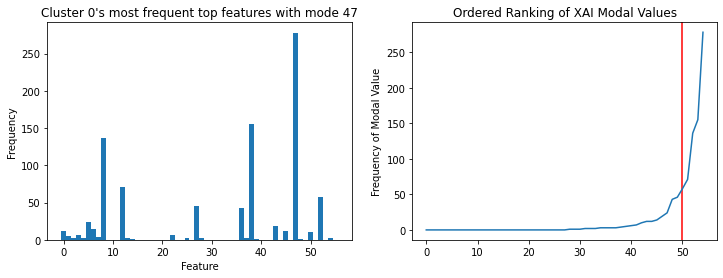

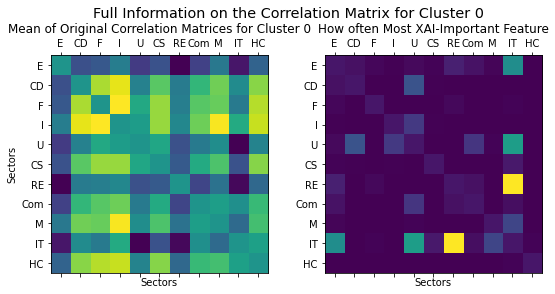

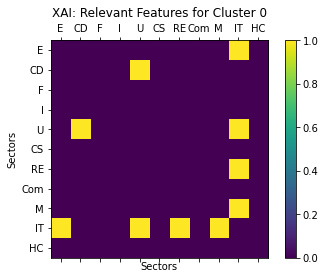

Relevant Correlations: ['E/IT', 'CD/U', 'U/IT', 'RE/IT', 'M/IT']
Cluster 0 is most XAI-influenced by correlation 47


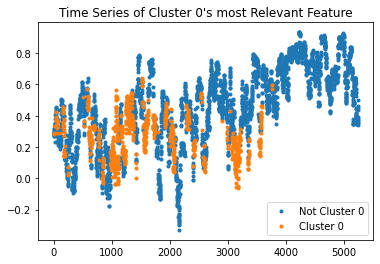

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
37


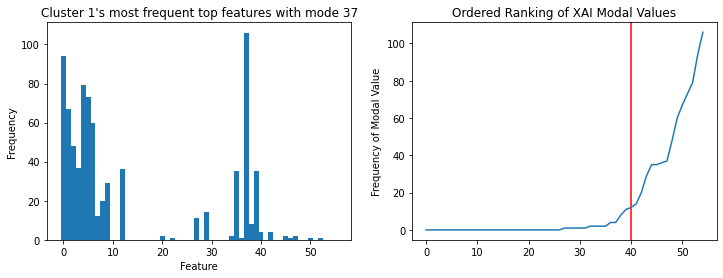

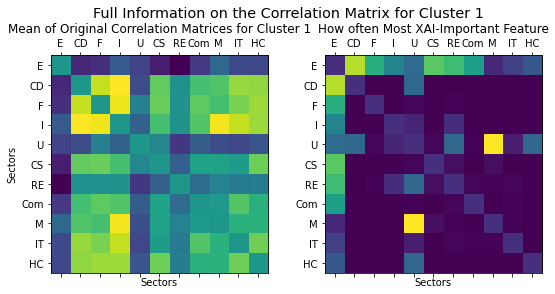

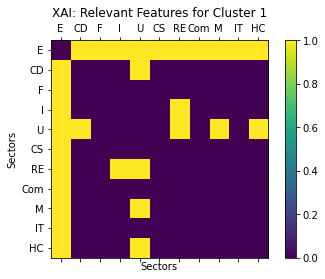

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/U', 'E/CS', 'E/RE', 'E/Com', 'E/M', 'E/IT', 'E/HC', 'CD/U', 'I/RE', 'U/RE', 'U/M', 'U/HC']
Cluster 1 is most XAI-influenced by correlation 37


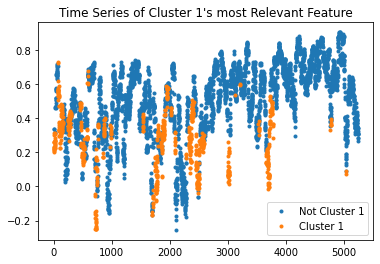

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
8


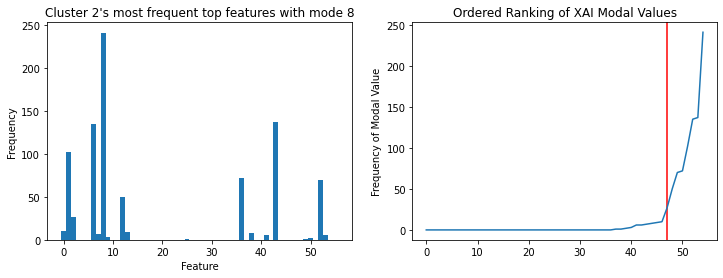

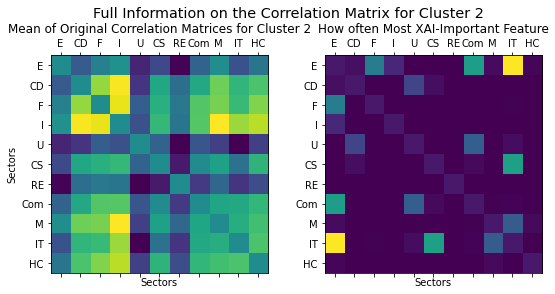

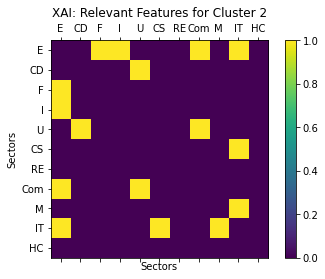

Relevant Correlations: ['E/F', 'E/I', 'E/Com', 'E/IT', 'CD/U', 'U/Com', 'CS/IT', 'M/IT']
Cluster 2 is most XAI-influenced by correlation 8


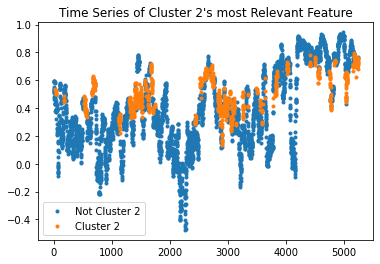

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
43


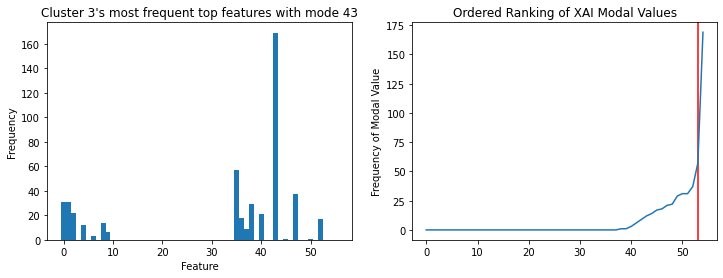

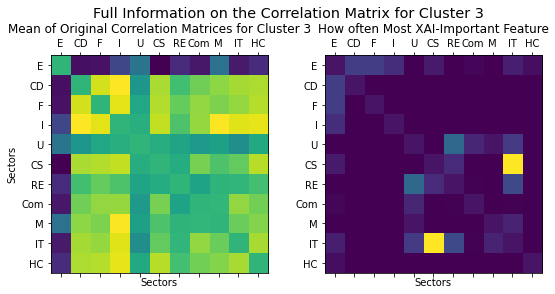

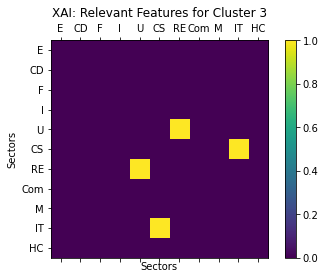

Relevant Correlations: ['U/RE', 'CS/IT']
Cluster 3 is most XAI-influenced by correlation 43


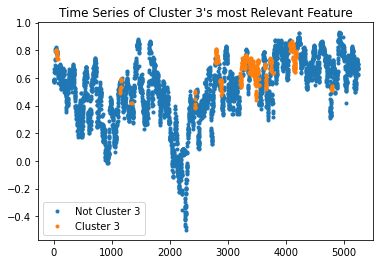

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
45


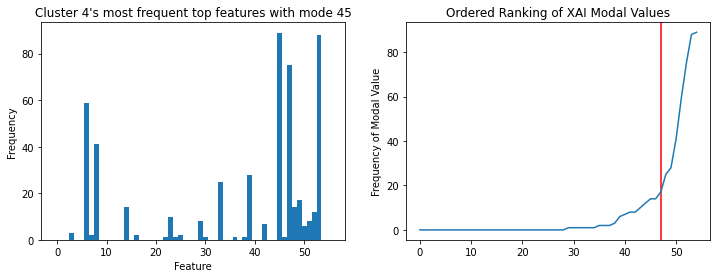

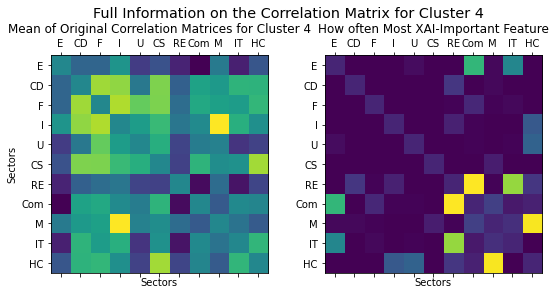

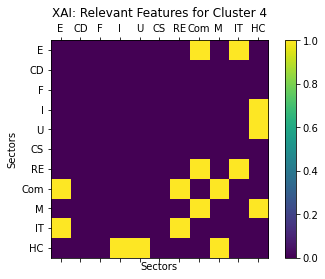

Relevant Correlations: ['E/Com', 'E/IT', 'I/HC', 'U/HC', 'RE/Com', 'RE/IT', 'Com/M', 'M/HC']
Cluster 4 is most XAI-influenced by correlation 45


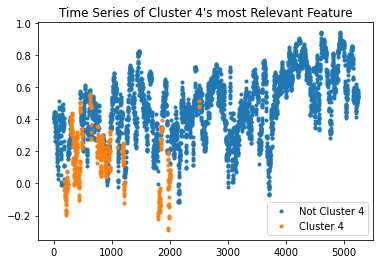

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
43


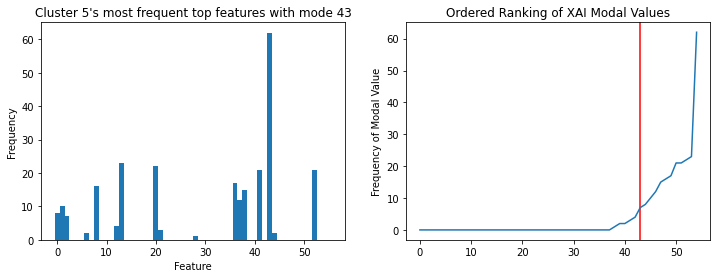

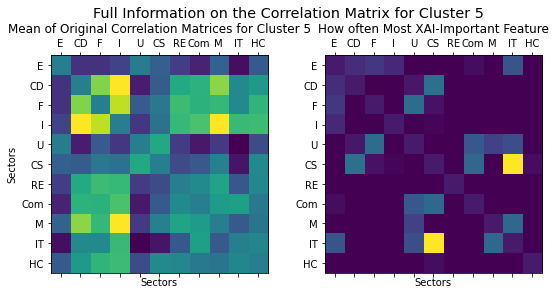

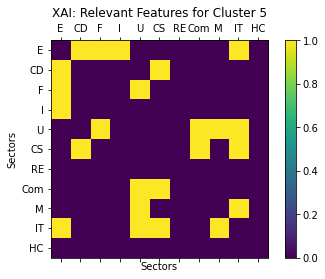

Relevant Correlations: ['E/CD', 'E/F', 'E/I', 'E/IT', 'CD/CS', 'F/U', 'U/Com', 'U/M', 'U/IT', 'CS/Com', 'CS/IT', 'M/IT']
Cluster 5 is most XAI-influenced by correlation 43


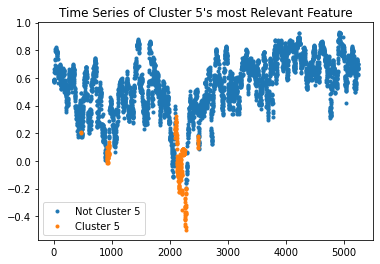

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
8


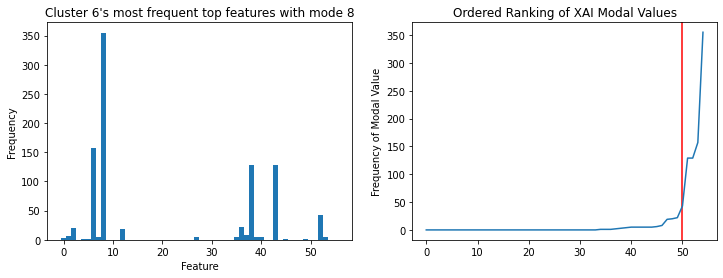

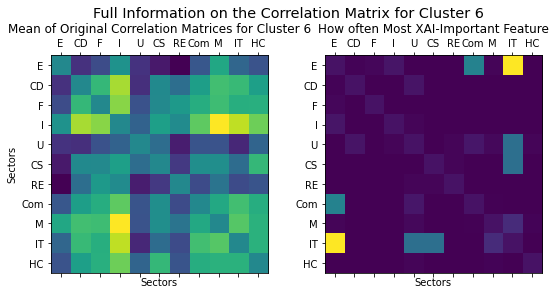

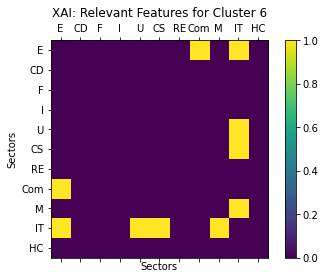

Relevant Correlations: ['E/Com', 'E/IT', 'U/IT', 'CS/IT', 'M/IT']
Cluster 6 is most XAI-influenced by correlation 8


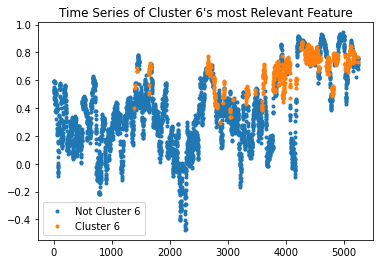

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#
8


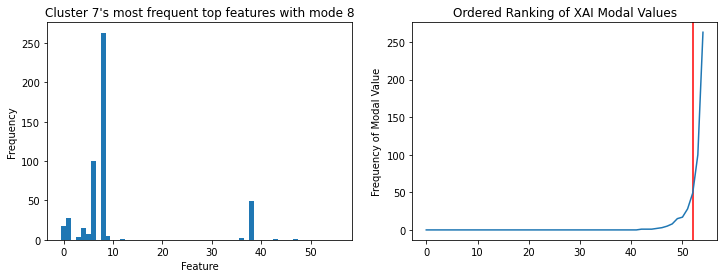

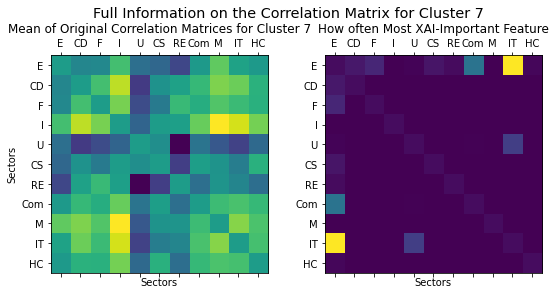

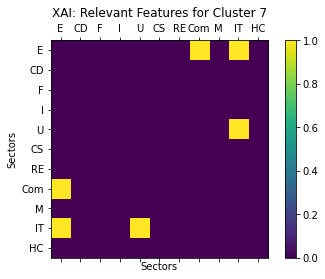

Relevant Correlations: ['E/Com', 'E/IT', 'U/IT']
Cluster 7 is most XAI-influenced by correlation 8


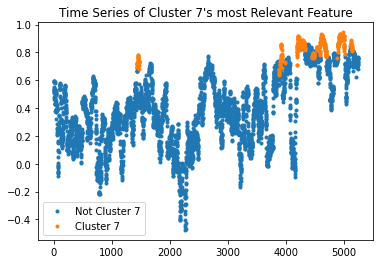

#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#


In [49]:
XAI_modes = np.empty((int(max(LabelNaiveOrdered)+1),2))




for j in range(1+int(max(LabelNaiveOrdered))):
    XAI_j = XAI[LabelNaiveOrdered==j,:]

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    ax1.hist(np.argmax(XAI_j,1), bins = np.arange(-0.5,
                                            XAI.shape[1]+1.5,
                                            1))
    print(mode(np.argmax(XAI_j,1))[0][0])
    XAI_modes[j,0] = j
    XAI_modes[j,1] = int(mode(np.argmax(XAI_j,1))[0][0])
    ax1.set_title("Cluster "+str(j)+"'s most frequent top features with mode "
              + str(mode(np.argmax(XAI_j,1))[0][0]))
    ax1.set_xlabel("Feature")
    ax1.set_ylabel("Frequency")

    Modes = np.unique(np.argmax(XAI[LabelNaiveOrdered==j,:],1),
             return_counts=True)
    RM = RankModes(Modes)

    ax2.set_title("Ordered Ranking of XAI Modal Values")
    ax2.set_ylabel("Frequency of Modal Value")
    ax2.axvline(len(RM[:,1])-CP_Modal_list[j][0],c="red")
    ax2.plot(np.sort(RM[:,1]))
    plt.show()



    ############


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Full Information on the Correlation Matrix for Cluster '+str(j),
                 fontsize = 'x-large',
                 y=1.05)
    fig.set_size_inches(9, 4)
    xaxis = np.arange(len(Names))

    ax1.matshow(ReverseDiag(CorrMatrices[LabelNaiveOrdered==j,:].mean(0),
                            MEAN = True))
    ax1.set_title("Mean of Original Correlation Matrices for Cluster " + str(j))
    ax1.set_xticks(xaxis)
    ax1.set_yticks(xaxis)
    ax1.set_xticklabels(Names)
    ax1.set_yticklabels(Names)

    ax2.matshow(ReverseDiag(RM[:,1], MEAN=True))
    ax2.set_title("How often Most XAI-Important Feature")
    ax2.set_xticks(xaxis)
    ax2.set_yticks(xaxis)
    ax2.set_xticklabels(Names)
    ax2.set_yticklabels(Names)

    ax1.set_xlabel('Sectors')
    ax1.set_ylabel('Sectors')
    ax2.set_xlabel('Sectors')
    plt.show()


    relIndex = np.zeros(55)
    relIndex[CP_Modal_list[j][1]] = 1.
    RelMat = ReverseDiag(relIndex,
                       ZERO = True)

    plot_matrix(RelMat,
            title = "XAI: Relevant Features for Cluster "+str(j),
           labels = Names)
    print("Relevant Correlations:",PrintNames(RelMat, Names))


    print("Cluster", j, "is most XAI-influenced by correlation",np.argmax(RM[:,1]))
    RelevantFeature = CorrMatrices[:,np.argmax(RM[:,1])]

    Time = np.arange(CorrMatrices.shape[0])

    plt.scatter(Time[LabelNaiveOrdered!=j],
            RelevantFeature[LabelNaiveOrdered!=j],
            marker =".", label="Not Cluster "+str(j))
    plt.scatter(Time[LabelNaiveOrdered==j],
            RelevantFeature[LabelNaiveOrdered==j],
            marker =".", label="Cluster "+str(j))
    plt.title("Time Series of Cluster "+str(j)+"'s most Relevant Feature")
    plt.legend()
    plt.show()

    print("#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#~#")

Makes sense that some features are used for more than one cluster because (my hypothesis:) their values help to differentiate exactly between those clusters

In [50]:
XAI_modes = XAI_modes.astype("int")
print(XAI_modes)
np.save("XAI_modes", XAI_modes)

[[ 0 47]
 [ 1 37]
 [ 2  8]
 [ 3 43]
 [ 4 45]
 [ 5 43]
 [ 6  8]
 [ 7  8]]


(array([ 0,  1,  3,  4,  5,  6,  8,  9, 12, 36, 38, 43, 47]), array([ 17,  28,   3,  15,   8, 100, 263,   5,   1,   2,  49,   1,   1]))


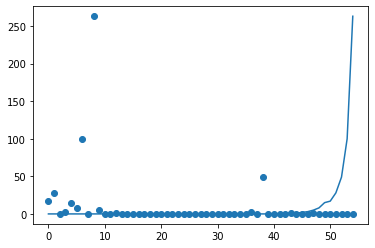

In [51]:
print(Modes)
Moderank = np.empty((len(Modes[0]),2))
Moderank[:,0], Moderank[:,1] = Modes[0], Modes[1]
Moderank = Moderank.astype("int")
Missing = set(range(CorrMatrices.shape[1])) - set(Moderank[:,0])
Missingrank = np.zeros((len(Missing),2)).astype("int")
Missingrank[:,0] = np.array(list(Missing))

Moderank = np.concatenate((Moderank, Missingrank))
Moderank = Moderank[Moderank[:, 0].argsort()]

plt.scatter(Moderank[:,0],
            Moderank[:,1])
plt.plot(Moderank[Moderank[:,1].argsort() ,1])

In [52]:


#Moderank = np.concatenate((Moderank, Missingrank))
#Moderank = Moderank[Moderank[:, 0].argsort()]

#plt.scatter(Moderank[:,0],
#            Moderank[:,1])
#plt.plot(Moderank[Moderank[:,1].argsort() ,1])


def RankModes(Modals):
    # Takes tuple Modes with Modals[0] = list of features which appear as modal values at least once
    #                        Modals[1] = list of how often the features are modal values

    Moderanks = np.empty((len(Modals[0]),2)) # 2D array for feature and number of being modal value
    Moderanks[:,0], Moderanks[:,1] = Modals[0], Modals[1]
    Moderanks = Moderanks.astype("int")

    # fill up the features which are never a modal value for any instance
    Missings = set(range(CorrMatrices.shape[1])) - set(Moderanks[:,0])
    Missingranks = np.zeros((len(Missings),2)).astype("int") # are modal values for 0 instances
    Missingranks[:,0] = np.array(list(Missings))

    # and combine both arrays
    Moderanks = np.concatenate((Moderanks, Missingranks))
    Moderanks = Moderanks[Moderanks[:, 0].argsort()]

    return(Moderanks)

RankModes(Moderank)

array([[ 0,  1],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  0],
       [13,  0],
       [14,  0],
       [15,  0],
       [16,  0],
       [17, 28],
       [18,  0],
       [19,  0],
       [20,  0],
       [21,  0],
       [22,  0],
       [23,  0],
       [24,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [28,  0],
       [29,  0],
       [30,  0],
       [31,  0],
       [32,  0],
       [33,  0],
       [34,  0],
       [35,  0],
       [36,  0],
       [37,  0],
       [38,  0],
       [39,  0],
       [40,  0],
       [41,  0],
       [42,  0],
       [43,  0],
       [44,  0],
       [45,  0],
       [46,  0],
       [47,  0],
       [48,  0],
       [49,  0],
       [50,  0],
       [51,  0],
       [52,  0],
       [53,  0],
       [54,  0]])